# Time Series Analysis : Components and Forecasting ARIMA

![](https://bizznotes.com/wp-content/uploads/2022/06/7807104_1578230927_time_analysis_tittle-banner-1.jpg)

A Time Series is a set of observations that are collected after regular intervals of time. It represents of time-based orders. This would be Years, Months, Weeks, Days, Hours, Minutes, and Seconds.

Time-Series Forecasting is the process of using a statistical model to predict future values of a time-series based on past results. In fact that A time series analysis encompasses statistical methods for analyzing time series data. These methods enable us to extract meaningful statistics, patterns and other characteristics of the data.

### **Time Series Components**

* Stationarity
* Trend
* Seasonality
* Cyclical variations
* Irregular variations

# Importing Libraries

In [1]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
from pandas import DataFrame
from pandas import concat
import numpy as np
from math import sqrt

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats import boxcox

import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from matplotlib import colors
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/time-series-datasets/daily-minimum-temperatures-in-me.csv
/kaggle/input/time-series-datasets/sales-of-shampoo-over-a-three-ye.csv
/kaggle/input/time-series-datasets/Electric_Production.csv
/kaggle/input/time-series-datasets/monthly-beer-production-in-austr.csv


# Loading Dataset

In [2]:
df = pd.read_csv("/kaggle/input/time-series-datasets/monthly-beer-production-in-austr.csv")
df.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [3]:
df.Month = pd.to_datetime(df.Month)

In [4]:
df = df.set_index("Month")
df.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


# Rolling Statistics

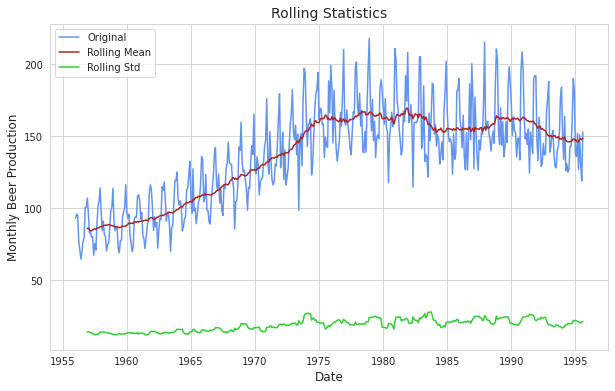

In [5]:
rolling_mean = df.rolling(window=12).mean()
rolling_std = df.rolling(window=12).std()
plt.figure(figsize = (10,6))
plt.plot(df, color='cornflowerblue', label='Original')
plt.plot(rolling_mean, color='firebrick', label='Rolling Mean')
plt.plot(rolling_std, color='limegreen', label='Rolling Std')
plt.xlabel('Date', size = 12)
plt.ylabel('Monthly Beer Production', size  = 12)
plt.legend(loc = 'upper left')
plt.title('Rolling Statistics', size = 14)
plt.show()

# Checking Stationary

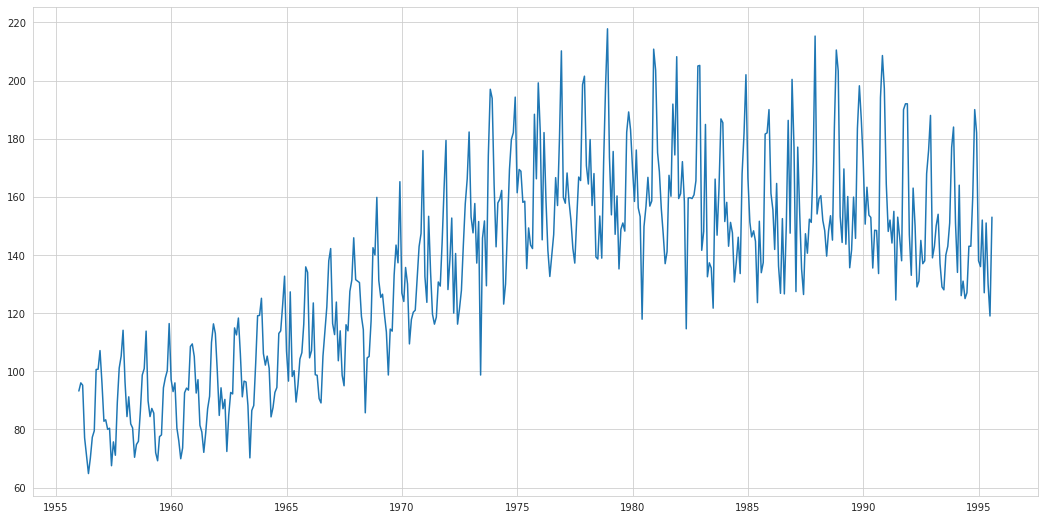

In [6]:
plt.figure(figsize=(18,9))
plt.plot(df.index, df["Monthly beer production"], linestyle="-")
plt.xlabel=('Dates')
plt.ylabel=('Total Production')
plt.show();

Looking at the plot we can observe there is an upward trend over the period of time. In addition to this, there is a seasonality in this data. So we will use SARIMA(Seasonal ARIMA) instead of ARIMA.

Seasonal ARIMA, is an extension of ARIMA that explicitly supports univariate time series data with a seasonal component. It adds three new hyperparameters to specify the autoregression (AR), differencing (I) and moving average (MA) for the seasonal component of the series, as well as an additional parameter for the period of the seasonality.

# Decomposition

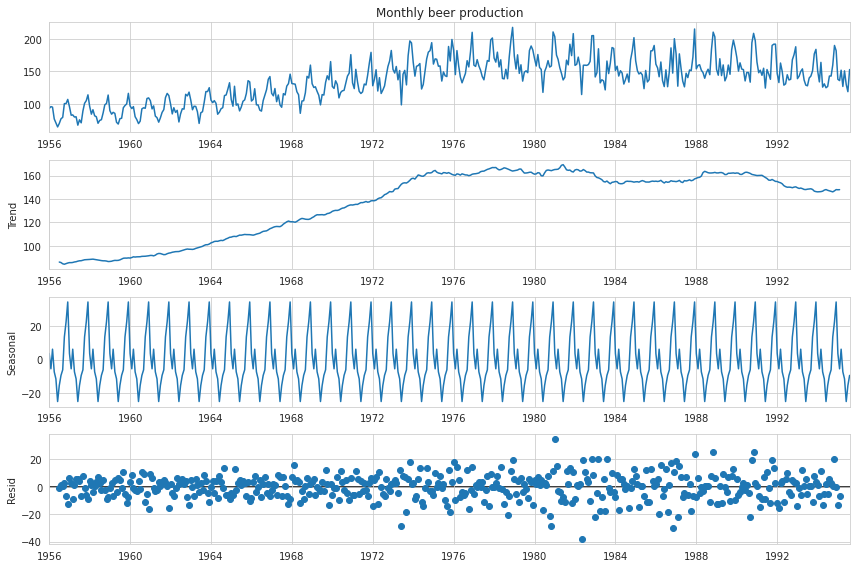

In [7]:
rcParams['figure.figsize']=12,8
a = seasonal_decompose(df["Monthly beer production"], model = "add")
a.plot();

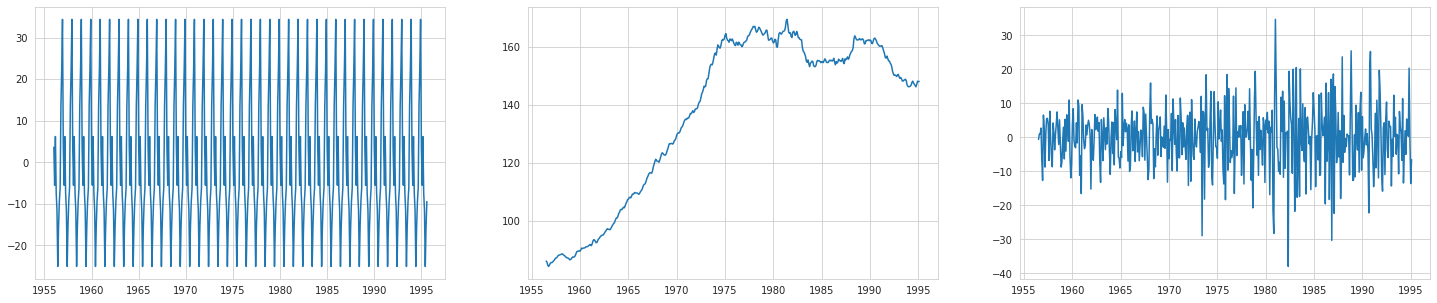

In [8]:
plt.figure(figsize = (25,5))
a = seasonal_decompose(df["Monthly beer production"], model = "add")
plt.subplot(1, 3, 1)
plt.plot(a.seasonal)

plt.subplot(1, 3, 2)
plt.plot(a.trend)

plt.subplot(1, 3, 3)
plt.plot(a.resid)

plt.show()


# Forecasting Models

**ARIMA Model** stands for Auto-Regressive Integrated Moving Average. It is is used for predicting future trends on a time series data. It is model that form of regression analysis.

**Auto-Regressive** models predict future behavior using past behavior where there is some correlation between past and future data.

**Integration** is the difference between present and previous observations. It is used to make the time series stationary.

**Moving Average** is a statistical method that takes the updated average of values to help cut down on noise. It takes the average over a specific interval of time

In [9]:
train_data = df[:len(df)-12]
test_data = df[len(df)-12:]

In [10]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


# Define ARIMA Model

In [11]:
arima_model = SARIMAX(train_data['Monthly beer production'], order = (2,1,1), seasonal_order = (4,0,3,12))
arima_result = arima_model.fit()
arima_result.summary()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.11947D+00    |proj g|=  1.61673D-01


 This problem is unconstrained.



At iterate    5    f=  4.02339D+00    |proj g|=  4.51168D-02

At iterate   10    f=  3.79642D+00    |proj g|=  5.26623D-02

At iterate   15    f=  3.75340D+00    |proj g|=  5.43161D-02

At iterate   20    f=  3.71372D+00    |proj g|=  1.09871D-02

At iterate   25    f=  3.71141D+00    |proj g|=  1.82589D-02

At iterate   30    f=  3.70606D+00    |proj g|=  1.03182D-01

At iterate   35    f=  3.68865D+00    |proj g|=  3.11196D-02

At iterate   40    f=  3.68273D+00    |proj g|=  1.53713D-02

At iterate   45    f=  3.68102D+00    |proj g|=  5.48867D-03

At iterate   50    f=  3.68089D+00    |proj g|=  5.67583D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                    Monthly beer production   No. Observations:                  464
Model:             SARIMAX(2, 1, 1)x(4, 0, [1, 2, 3], 12)   Log Likelihood               -1707.934
Date:                                    Thu, 08 Sep 2022   AIC                           3437.868
Time:                                            12:36:20   BIC                           3483.383
Sample:                                        01-01-1956   HQIC                          3455.786
                                             - 08-01-1994                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1197      0.037     -3.275      0.001      -0.191      -0.048
ar.L2         -0.1712      0.043     -3.989      0.000      -0.255      -0.087
ma.L1         -0.8464      0.026    -32.232      0.000      -0.898      -0.795
ar.S.L12       1.7550      0.087     20.106      0.000       1.584       1.926
ar.S.L24      -1.6181      0.148    -10.952      0.000      -1.908      -1.329
ar.S.L36       0.7964      0.101      7.885      0.000       0.598       0.994
ar.S.L48       0.0656      0.038      1.743      0.081      -0.008       0.139
ma.S.L12      -1.5550      0.106    -14.687      0.000      -1.763      -1.348
ma.S.L24       1.4023      0.161      8.712      0.000       1.087       1.718
ma.S.L36      -0.6724      0.089     -7.549      0.000      -0.847      -0.498
sigma2        83.5578      4.788     17.452      0.000      74.174      92.942
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                41.24
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               4.09   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Predictions

In [12]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

1994-09-01    134.005356
1994-10-01    157.579894
1994-11-01    182.136381
1994-12-01    183.627387
1995-01-01    144.730490
1995-02-01    137.017380
1995-03-01    151.196686
1995-04-01    133.181514
1995-05-01    138.287092
1995-06-01    120.493129
1995-07-01    128.310550
1995-08-01    138.967765
Freq: MS, Name: ARIMA Predictions, dtype: float64

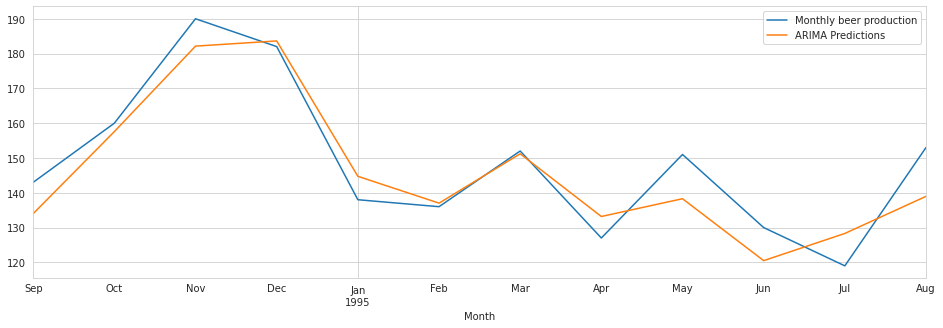

In [13]:
test_data['Monthly beer production'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [14]:
from statsmodels.tools.eval_measures import rmse

# RMSE/MSE Errors

In [15]:
arima_rmse_error = rmse(test_data['Monthly beer production'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = df['Monthly beer production'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 64.33541744381766
RMSE Error: 8.020936194972359
Mean: 136.3953781512605


The statsmodels library provides the capability to fit an ARIMA model.

An ARIMA model can be created using the statsmodels library as follows:

1. Define the model by calling ARIMA() and passing in the p, d, and q parameters.
2. The model is prepared on the training data by calling the fit() function.
3. Predictions can be made by calling the predict() function and specifying the index of the time or times to be predicted.

Let’s start off with something simple. We will fit an ARIMA model to the entire Monthly Beer Production dataset.


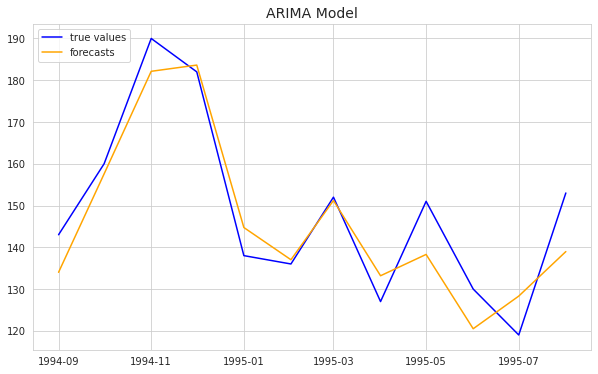

In [16]:
plt.figure(figsize = (10,6))
plt.plot(test_data, label = "true values", color = "blue")
plt.plot(arima_pred,label = "forecasts", color='orange')
plt.title("ARIMA Model", size = 14)
plt.legend(loc = 'upper left')
plt.show()

In [17]:
test_data['ARIMA_Predictions'] = arima_pred


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
test_data

,Monthly beer production,ARIMA_Predictions
Month,,
1994-09-01,143.0,134.005356
1994-10-01,160.0,157.579894
1994-11-01,190.0,182.136381
1994-12-01,182.0,183.627387
1995-01-01,138.0,144.730490
1995-02-01,136.0,137.017380
1995-03-01,152.0,151.196686
1995-04-01,127.0,133.181514
1995-05-01,151.0,138.287092


# References

https://www.kaggle.com/code/sercanyesiloz/electricity-production-forecasting-arima/notebook#Mean%20Squared%20Errors

https://www.miuul.com/zaman-serileri

Thank you for your suggestions and comments :)